<center><h1><b>Hough Transform Implementation</b></h1></center>

### In this file , I will be implementing Hough Transform codes for better understanding of its working.

<h3>Standard Hough Line Transform</h3>

<b><i>Python code:</i></b>cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn]]])

Arguments of <i>HoughLines()</i>:
<ul>
    <li>edges: Output of the edge detector. 
    <li>lines: A vector that will store the parameters (r,θ) of the detected lines
    <li>rho : The resolution of the parameter r in pixels. We use 1 pixel.
    <li>theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
    <li>threshold: The minimum number of intersections to "*detect*" a line
    <li>srn and stn: Default parameters to zero. 
</ul>

In [1]:
# Import the necessary Libraries
import math
import cv2
import numpy as np

In [2]:
# Read image 
img = cv2.imread('LudoBoard.jpg')

# Find the edges in the image using canny detector
edges = cv2.Canny(img,50, 200)

# Detect points that form a line
lines = cv2.HoughLines(edges, 1, np.pi/180,threshold=200)

# Draw lines
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(img, pt1, pt2, (255,255,0), 3)

# Show result
cv2.imshow("Standard Hough Line Transform", img)
cv2.waitKey()

-1

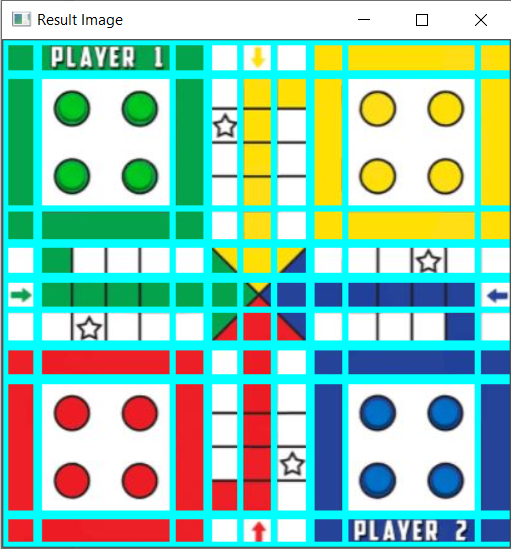

<h3>Probabilistic Hough Line Transform</h3>

<b><i>Python code:</i></b>cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) 

Arguments of <i>HoughLinesP()</i>:
<ul>
    <li>edges: Output of the edge detector. 
    <li>lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines
    <li>rho : The resolution of the parameter r in pixels. We use 1 pixel.
    <li>theta: The resolution of the parameter θ in radians. We use 1 degree (np.pi /180)
    <li>threshold: The minimum number of intersections to detect a line.
    <li>minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
    <li>maxLineGap: The maximum gap between two points to be considered in the same line.
</ul>

In [3]:
# Import the necessary Libraries
import numpy as np
import cv2

In [4]:
# Use the following code to use cv2 library without error in Jupyter notebook 
def get_lines(lines_in):
    if cv2.__version__ < '3.0':
        return lines_in[0]
    return [l[0] for l in lines]

# Read image 
img = cv2.imread('LudoBoard.jpg')

# Find the edges in the image using canny detector
edges = cv2.Canny(img, 50, 200)

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180,threshold=200, minLineLength=40, maxLineGap=200)

# Draw lines
for line in get_lines(lines):
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (255, 255, 0), 3)
    
# Show result
cv2.imshow("Probabilistic Hough Line Transform", img)
cv2.waitKey()

-1

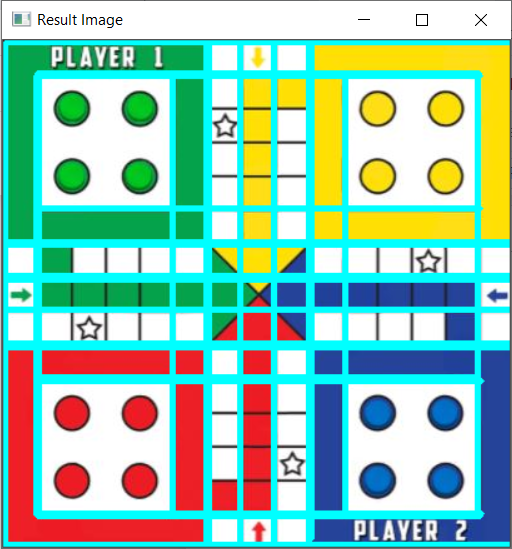

<h3><i>The number of lines detected vary when the threshold is changed. As higher the threshold, fewer lines will be detected since  more points would be needed to declare the line detected.</i></h3>

<h3>Hough Circle Transform</h3>

<b><i>Python code:</i></b> cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) 

Arguments of <i>HoughCircles()</i>:
<ul>
    <li>blurred: Input image (after applying grayscale and softening).
    <li>HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
    <li>dp = 1: The inverse ratio of resolution.
    <li>min_dist = gray.rows/16 =20: Minimum distance between detected centers.
    <li>param_1 = 200: Upper threshold for the internal Canny edge detector.
    <li>param_2 = 40: Threshold for center detection.
    <li>min_radius = 0: Minimum radius to be detected. If unknown, put zero as default.
    <li>max_radius = 0: Maximum radius to be detected. If unknown, put zero as default.
</ul>

In [5]:
# Import the necessary Libraries
import numpy as np
import cv2

# Read image
img = cv2.imread('test_image-2.png')

# Convert image to grayscale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Softening the image by blurring the grayscale image
blurred = cv2.medianBlur(img_gray,3)

# Finds circles in the input image using the Hough transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20,param1=200,param2=40,minRadius=0,maxRadius=0)

# Check to see if there is any detection
if circles is not None:
    # If there are some detections, convert radius and x,y(center) coordinates to integer
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)

# Show result
cv2.imshow("Hough Circle Transform",img)
cv2.waitKey(0)

-1

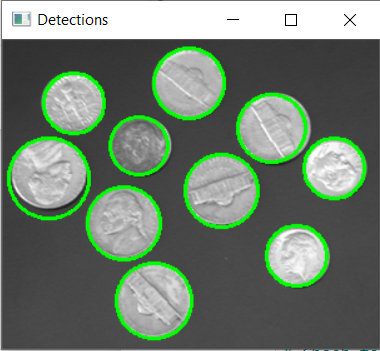

<h3>Conclusion:</h3>

<h4><b>We can therefore detect lines, circles and other parametric curves in a image using Hough Transform.</b></h4>